### Load libraries and create png file of the background map

In [1]:
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import numpy as np
from highlight_text import fig_text
from pyfonts import load_font
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


proj = ccrs.Mercator()
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson"
world = gpd.read_file(url)
world = world.to_crs(proj.proj4_init)

fig, ax = plt.subplots(
   dpi=300,
   figsize=(12, 8),
   subplot_kw={'projection': ccrs.Mercator(central_longitude=180)}
)

ax.set_extent([120, 240, -50, 20], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='lightgrey', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

world.plot(ax=ax, transform=ccrs.PlateCarree(), facecolor='none', edgecolor='darkgrey', linewidth=0.5)
ax.set_axis_off()

plt.savefig("backgroundmap.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.close()

<br>

### Load dataset

In [13]:
df = pd.read_csv("social-protection/social-protection.csv").dropna(axis=1)
df = df[["OBS_VALUE", "Sex", "Age", "Pacific Island Countries and territories", "INDICATOR"]]
df = df[df["Age"] != "15+"]

df.columns = ["value", "sex", "age", "island", "metric"]

df.loc[df['sex'] == 'Female', 'value'] *= -1
df.sort_values(by=["island", "age", "sex"]).head()

,value,sex,age,island,metric
25,-5.5,Female,15-24,Kiribati,SI_COV_BENFTS
3,6.3,Male,15-24,Kiribati,SI_COV_BENFTS
10,-19.5,Female,25-54,Kiribati,SI_COV_BENFTS
22,28.5,Male,25-54,Kiribati,SI_COV_BENFTS
28,-5.1,Female,55-64,Kiribati,SI_COV_BENFTS


<br>

### Chart parameters

In [29]:
# FONT
boldfont = load_font(
   "https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Bold.ttf?raw=true"
)
font = load_font(
   "https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Regular.ttf?raw=true"
)

# COLORS
color_map = {'Male': 'blue', 'Female': 'red'}
colors = df['sex'].map(color_map).to_list()

<br>

### Actual chart

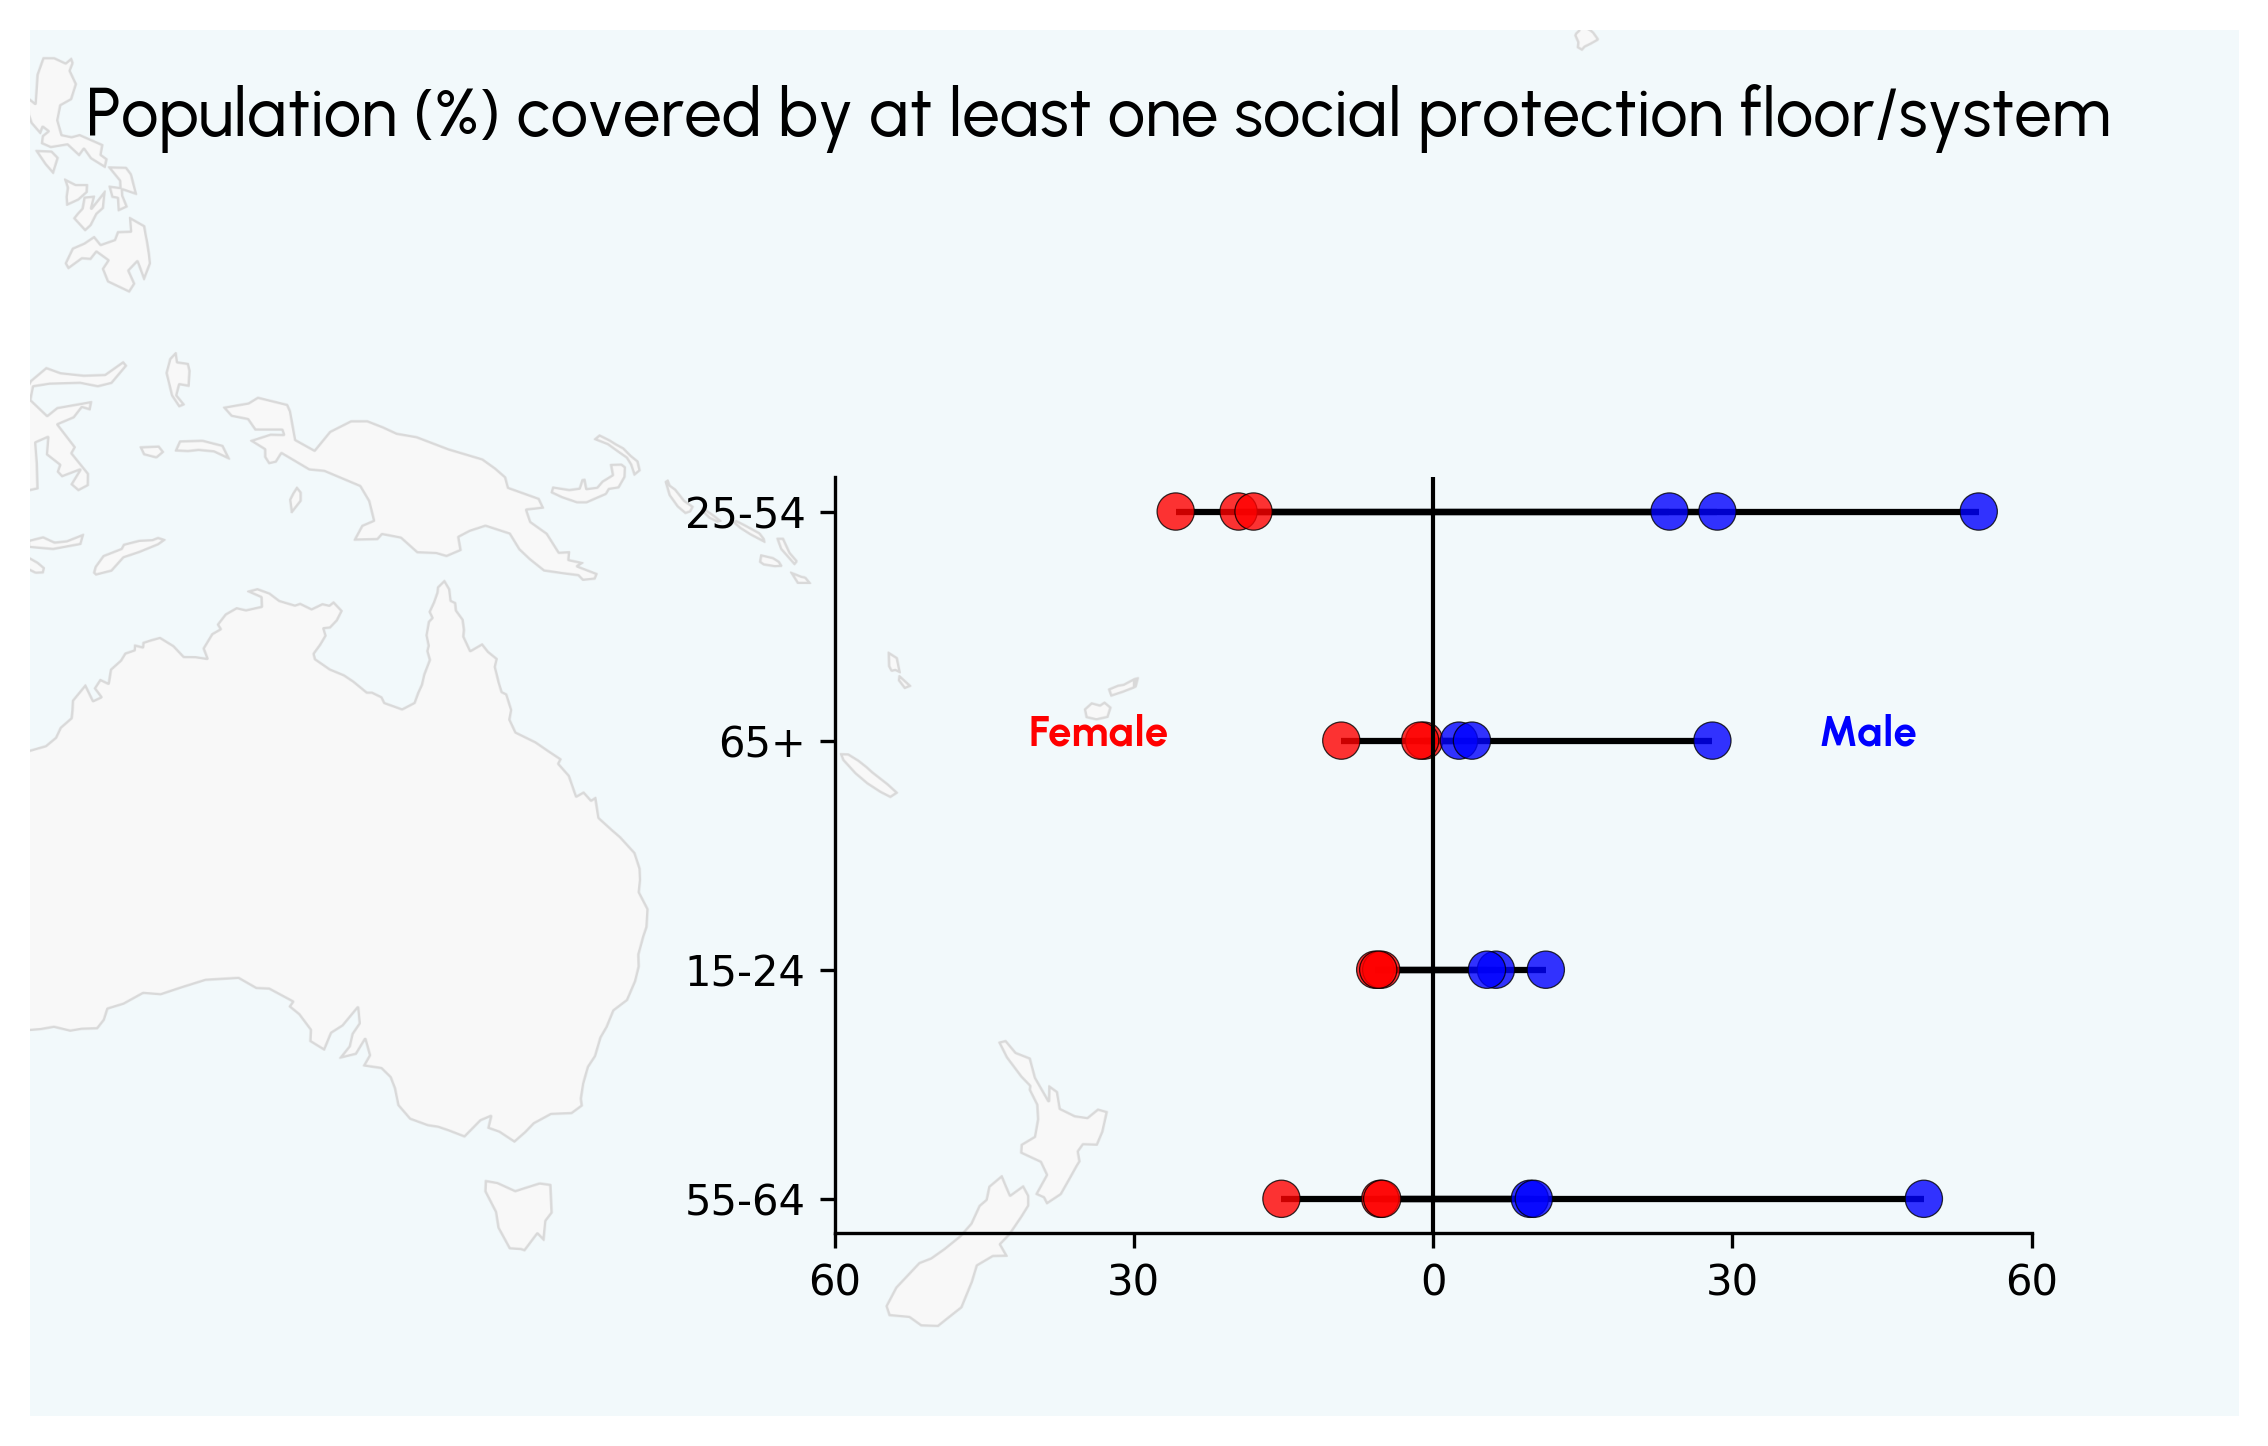

In [35]:
fig, ax = plt.subplots(dpi=300, figsize=(9.5, 6))

path_bg = 'backgroundmap.png'
background_img = plt.imread(path_bg)
ax.imshow(background_img, extent=[0, 1, 0, 1], aspect='auto', alpha=0.15)
ax.set_axis_off()

sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="70%",
    bbox_to_anchor=(0.4, 0.2, 0.6, 0.6),  # (x, y, width, height) in percentage of the figure
    bbox_transform=fig.transFigure,
)
sub_ax.set_xlim(-60, 60)
sub_ax.set_xticks([-60, -30, 0, 30, 60])
sub_ax.set_xticklabels(['60', '30', '0', '30', '60'])
#sub_ax.set_yticklabels([])
#sub_ax.set_yticks([])
sub_ax.spines[['top', 'right']].set_visible(False)
sub_ax.patch.set_alpha(0)
sub_ax.hlines(y=df['age'], xmin=0, xmax=df['value'], color='black')
sub_ax.scatter(df['value'], df['age'], c=colors, zorder=2, s=80, edgecolor='black', alpha=0.8, linewidth=0.3)
sub_ax.axvline(0, color='black', lw=1)

title = "Population (%) covered by at least one social protection floor/system"
fig_text(
    x=0.5, y=0.85, s=title, ha="center", va="top",
    font=font, fontsize=16, fig=fig
)
fig_text(
    x=0.5, y=0.5, s="Female", ha="center", va="top",
    font=boldfont, fontsize=10, fig=fig, color="red"
)
fig_text(
    x=0.77, y=0.5, s="Male", ha="center", va="top",
    font=boldfont, fontsize=10, fig=fig, color="blue"
)

plt.savefig("chart.png", dpi=300, bbox_inches="tight")
plt.show()